# Importing Module

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.metrics import classification_report 

ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)
ERROR: No matching distribution found for sklearn


Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/sklearn/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/sklearn/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1129)'))) - skipping


# Data Pre-processing

In [10]:
X, y = make_classification(n_samples=100000, n_features=32,n_informative=32,n_redundant=0, n_repeated=0, n_classes=2,n_clusters_per_class=1,weights=[0.995, 0.005],class_sep=0.5, random_state=0)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [15]:
print("The number of records in the training dataset is",X_train.shape[0])
print("The number of records in the test dataset is",X_test.shape[0])

The number of records in the training dataset is 80000
The number of records in the test dataset is 20000


# Encoder and Decoder declare

In [19]:
X_train_normal = X_train[np.where(y_train == 0)]
input = tf.keras.layers.Input(shape=(32,))# Encoder layers
encoder = tf.keras.Sequential([layers.Dense(16, activation="relu"),layers.Dense(8, activation='relu'),layers.Dense(4, activation='relu')])(input)
decoder = tf.keras.Sequential([layers.Dense(8, activation='relu'),layers.Dense(16, activation='relu'),layers.Dense(32, activation='sigmoid')])(encoder)
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)

# Compile the model

In [20]:
autoencoder.compile(optimizer='adam', loss='mae')
history = autoencoder.fit(X_train_normal, X_train_normal,epochs=20,batch_size=64,validation_data=(X_test, X_test),shuffle=True)

Epoch 1/20
1238/1238 [==============================] - 2s 972us/step - loss: 2.5357 - val_loss: 2.5040
Epoch 2/20
1238/1238 [==============================] - 1s 848us/step - loss: 2.4916 - val_loss: 2.4885
Epoch 3/20
1238/1238 [==============================] - 1s 806us/step - loss: 2.4798 - val_loss: 2.4798
Epoch 4/20
1238/1238 [==============================] - 1s 824us/step - loss: 2.4729 - val_loss: 2.4755
Epoch 5/20
1238/1238 [==============================] - 1s 831us/step - loss: 2.4692 - val_loss: 2.4716
Epoch 6/20
1238/1238 [==============================] - 1s 807us/step - loss: 2.4670 - val_loss: 2.4699
Epoch 7/20
1238/1238 [==============================] - 1s 795us/step - loss: 2.4654 - val_loss: 2.4690
Epoch 8/20
1238/1238 [==============================] - 1s 818us/step - loss: 2.4640 - val_loss: 2.4672
Epoch 9/20
1238/1238 [==============================] - 1s 799us/step - loss: 2.4627 - val_loss: 2.4659
Epoch 10/20
1238/1238 [==============================] - 1s 784u

# Visulaization

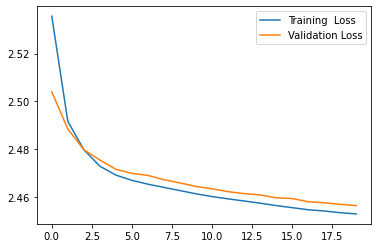

In [21]:
plt.plot(history.history['loss'], label='Training  Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

625/625 [==============================] - 0s 494us/step
The prediction loss threshold for 2% of outliers is 3.44


<AxesSubplot:ylabel='Count'>

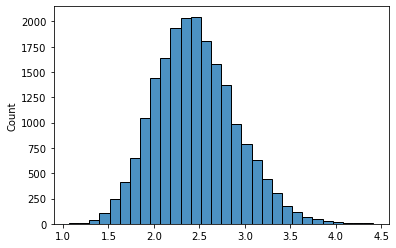

In [23]:
prediction = autoencoder.predict(X_test)
prediction_loss = tf.keras.losses.mae(prediction, X_test)
loss_threshold = np.percentile(prediction_loss, 98)
print(f'The prediction loss threshold for 2% of outliers is {loss_threshold:.2f}')
sns.histplot(prediction_loss, bins=30, alpha=0.8)

# Classification Report

In [28]:
threshold_prediction = [0 if i < loss_threshold else 1 for i in prediction_loss]
print(classification_report(y_test, threshold_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19803
           1       0.00      0.01      0.00       197

    accuracy                           0.97     20000
   macro avg       0.50      0.49      0.49     20000
weighted avg       0.98      0.97      0.98     20000

